<a href="https://colab.research.google.com/github/Nikiloshen/Task-for-WINSTARS.AI/blob/master/EDA_for_2_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle
from google.colab import files
print("Upload 'kaggle.json' file...")
files.upload()

Upload 'kaggle.json' file...


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikiloshen","key":"6e76dc0c674cf72a7a1591a5dc4a0e13"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download alessiocorrado99/animals10
!unzip animals10.zip

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
import glob
import random
from PIL import Image
from tqdm import tqdm

## Dataset

**Animals-10 Kaggle Dataset**

This dataset contains about 26K medium quality animal images belonging to 10 categories: dog, cat, horse, spider, butterfly, chicken, sheep, cow, squirrel, elephant.

# Loading The Data

In [ ]:
classes = { "cane": "dog",
            "cavallo": "horse",
            "elefante": "elephant",
            "farfalla": "butterfly",
            "gallina": "chicken",
            "gatto": "cat",
            "mucca": "cow",
            "pecora": "sheep",
            "ragno": "spider",
            "scoiattolo": "squirrel"
            }
data = {
    "path":[],
    "label":[]
}
data_dir="/content/raw-img"

Show Some Samples of Dataset

In [ ]:
for label_it,label_en in classes.items():
    paths = glob.glob(f'{data_dir}/{label_it}/*.jpeg')

    data["path"].extend(paths)
    data["label"].extend([label_en] * len(paths))

df_data = pd.DataFrame(data)
df_data.head()

,path,label
0,/content/raw-img/cane/OIP-EawawIUaedQJcOqmYaLp...,dog
1,/content/raw-img/cane/OIP-1wq9vP9_aPSM7THOwyo2...,dog
2,/content/raw-img/cane/OIP-LD6SwJA79HTRdaVR29DY...,dog
3,/content/raw-img/cane/OIP-GGaCOW2W7S_Z_UNRofII...,dog
4,/content/raw-img/cane/OIP-t-5wfwdi8V5FNwACD7xG...,dog


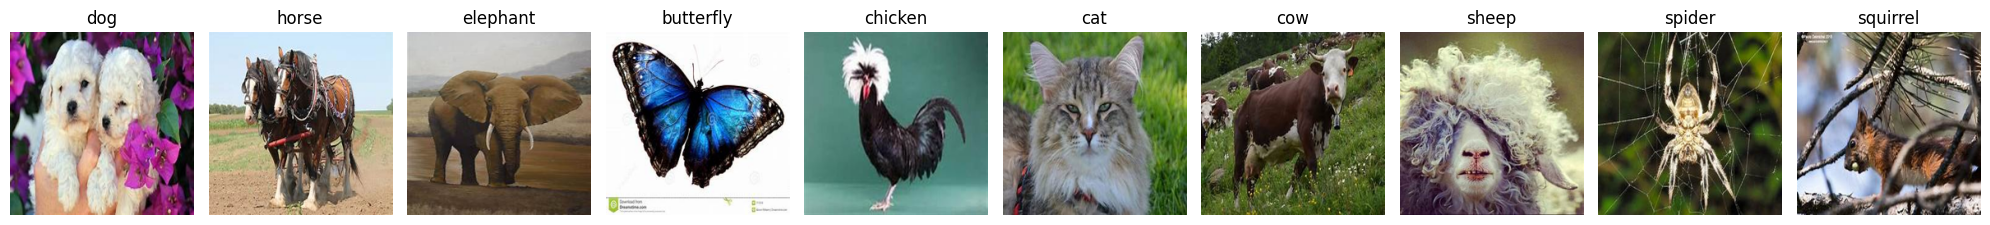

In [ ]:
plt.figure(figsize = (20, 7))

for idx, i in enumerate(df_data.label.unique()):
    plt.subplot(1, 10, idx + 1)
    df = df_data[df_data['label'] == i].reset_index(drop=True)

    image_path = df.loc[random.randint(0, len(df) - 1), 'path']
    img = Image.open(image_path)
    img = img.resize((224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)

plt.tight_layout()
plt.show()

In [ ]:
Dataset = datasets.ImageFolder(root=data_dir, transform=transform)
# Print the number of classes
num_classes = len(Dataset.classes)
print(f"Number of classes: {num_classes}")

# Print the number of samples
num_samples = len(Dataset)
print(f"Number of samples: {num_samples}")

Number of classes: 10
Number of samples: 26179


In [ ]:
Dataset

Dataset ImageFolder
    Number of datapoints: 26179
    Root location: /content/raw-img
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )